<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/8OtherClasses/%E7%89%A9%E7%90%86%E5%8C%96%E5%AD%A656.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colabで数式をきれいに表示するためのhack.

In [0]:
## setting up colab to show sympy formulae in latex
from sympy          import init_printing
from sympy.printing import latex

def colab_LaTeX_printer(exp, **options):  
    from google.colab.output._publish import javascript 

    url_ = "https://colab.research.google.com/static/mathjax/MathJax.js?"
    cfg_ = "config=TeX-MML-AM_HTMLorMML" # "config=default"

    javascript(url=url_+cfg_)

    return latex(exp, **options)
# end of def
init_printing(use_latex="mathjax", latex_printer=colab_LaTeX_printer) 


# 資料

## 2.3節 気体分子の振動

振動の分配関数から、振動の比熱を導く。

In [2]:
from sympy import *
# 解析的変数の定義
T, nu, h, k, N, iT, theta = symbols("T nu h k N iT theta")

# Eq. (2.29)
z_vib = 1/(exp(h*nu/(2*k*T))-exp(-h*nu/(2*k*T)))
z_vib

       1       
───────────────
  h⋅ν     -h⋅ν 
 ─────    ─────
 2⋅T⋅k    2⋅T⋅k
ℯ      - ℯ     

振動のエネルギー Eq. (2.33)。温度の逆数をiTとして書きなおしてから、iTで微分する。

In [3]:
# 変数の置きかえ
z_vib2 = Subs(z_vib, T, 1/iT).doit()
z_vib2


         1         
───────────────────
 h⋅iT⋅ν    -h⋅iT⋅ν 
 ──────    ────────
  2⋅k        2⋅k   
ℯ       - ℯ        

In [4]:
# 微分
E_vib2=-k*diff(log(z_vib2), iT)
E_vib2

   ⎛       h⋅iT⋅ν        -h⋅iT⋅ν ⎞ 
   ⎜       ──────        ────────⎟ 
   ⎜        2⋅k            2⋅k   ⎟ 
   ⎜  h⋅ν⋅ℯ         h⋅ν⋅ℯ        ⎟ 
-k⋅⎜- ─────────── - ─────────────⎟ 
   ⎝      2⋅k            2⋅k     ⎠ 
───────────────────────────────────
         h⋅iT⋅ν    -h⋅iT⋅ν         
         ──────    ────────        
          2⋅k        2⋅k           
        ℯ       - ℯ                

In [5]:
# iTをTに戻す。
E_vib = Subs(E_vib2, iT, 1/T).doit()
E_vib.simplify()

    ⎛ h⋅ν    ⎞
    ⎜ ───    ⎟
    ⎜ T⋅k    ⎟
h⋅ν⋅⎝ℯ    + 1⎠
──────────────
     h⋅ν      
     ───      
     T⋅k      
  2⋅ℯ    - 2  

比熱 Eq. (2.35)

In [6]:
Cv0 = diff(E_vib, T).simplify()
Cv0

               h⋅ν        
               ───        
         2  2  T⋅k        
        h ⋅ν ⋅ℯ           
──────────────────────────
     ⎛ 2⋅h⋅ν      h⋅ν    ⎞
     ⎜ ─────      ───    ⎟
 2   ⎜  T⋅k       T⋅k    ⎟
T ⋅k⋅⎝ℯ      - 2⋅ℯ    + 1⎠

In [7]:
# θ=h nu/kを使ってシンプルにする。
Subs(Cv0, h, k*theta/nu).doit()

            θ       
            ─       
         2  T       
      k⋅θ ⋅ℯ        
────────────────────
   ⎛ 2⋅θ      θ    ⎞
   ⎜ ───      ─    ⎟
 2 ⎜  T       T    ⎟
T ⋅⎝ℯ    - 2⋅ℯ  + 1⎠

振動の比熱をθ/Tの関数として定義しておく。

In [0]:
def Cv_vib(theta_over_T):
    x = theta_over_T
    return R*x**2*exp(x)/(1-exp(x))**2



$\nu$ を$\theta_v$に変換する関数を準備しておく。

In [15]:
h = 6.62607e-34
c = 299792458.00
k = 1.38065e-23
N = 6.022e23
R = N*k
def θv(nu):
    """nu in cm-1"""
    nu *= c*100
    return h*nu/k


1.4387758028320428

プロットする温度範囲を定義する。

In [22]:
import numpy as np

T = np.linspace(10.,3000.,100)
T

array([  10.        ,   40.2020202 ,   70.4040404 ,  100.60606061,
        130.80808081,  161.01010101,  191.21212121,  221.41414141,
        251.61616162,  281.81818182,  312.02020202,  342.22222222,
        372.42424242,  402.62626263,  432.82828283,  463.03030303,
        493.23232323,  523.43434343,  553.63636364,  583.83838384,
        614.04040404,  644.24242424,  674.44444444,  704.64646465,
        734.84848485,  765.05050505,  795.25252525,  825.45454545,
        855.65656566,  885.85858586,  916.06060606,  946.26262626,
        976.46464646, 1006.66666667, 1036.86868687, 1067.07070707,
       1097.27272727, 1127.47474747, 1157.67676768, 1187.87878788,
       1218.08080808, 1248.28282828, 1278.48484848, 1308.68686869,
       1338.88888889, 1369.09090909, 1399.29292929, 1429.49494949,
       1459.6969697 , 1489.8989899 , 1520.1010101 , 1550.3030303 ,
       1580.50505051, 1610.70707071, 1640.90909091, 1671.11111111,
       1701.31313131, 1731.51515152, 1761.71717172, 1791.91919

CO2の3種類の振動による比熱の温度依存性をプロットする。

3つの振動の特性温度はそれぞれ667.4 K, 1388 K, 2349 Kである。

また、最も低い振動数については、2重に縮退している。(x方向の振動とy方向の振動の振動数が同一)



Text(0, 0.5, 'Cv_{vib} / R')

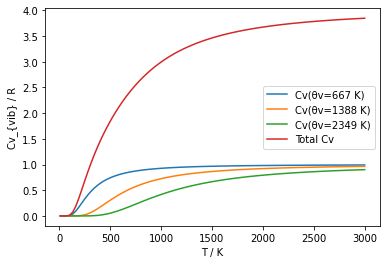

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt

from numpy import exp

plt.plot(T, Cv_vib(θv(667.4)/T) / R,  label="Cv(θv=667 K)")
plt.plot(T, Cv_vib(θv(1388)/T) / R,   label="Cv(θv=1388 K)")
plt.plot(T, Cv_vib(θv(2349)/T) / R,   label="Cv(θv=2349 K)")
plt.plot(T, (2*Cv_vib(θv(667.4)/T) 
             + Cv_vib(θv(1388)/T)
             + Cv_vib(θv(2349)/T))/R, label="Total Cv")

plt.legend()
plt.xlabel("T / K")
plt.ylabel("Cv_{vib} / R")


N2, O2, F2の振動数はそれぞれ2358, 1580, 892 cm$^{-1}$である。またI2の特性温度は309 Kである。